In [1]:
import finlab

In [2]:
finlab.login(api_token='ID0hv1JVLP3bs86Qg/xslT1fwKjN0bclQVRCH7eQiAYh3e5/XNh77u3zaPDOOGJQ#vip_m')

輸入成功!


In [3]:
from finlab import data
from finlab.backtest import sim
import pandas as pd
import numpy as np
from finlab import data
from finlab.backtest import sim
import pandas as pd
import numpy as np
from finlab import backtest

In [4]:
with data.universe('TSE_OTC'):
    benchmark = data.get('benchmark_return:發行量加權股價報酬指數', save_to_storage=True)
    close = data.get('price:收盤價')
    volume = data.get('price:成交股數', save_to_storage=True)
    gross_profit_per = data.get('fundamental_features:營業毛利率')


 Use "pip install finlab==0.4.4" to update the latest version.


In [5]:
# 計算每日漲幅
change_per = (close - close.shift(1))/close.shift(1)

In [6]:
atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close


In [7]:
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')


In [8]:
inventory = data.get('inventory')
inventory

,stock_id,持股分級,人數,持有股數,占集保庫存數比例
date,,,,,
2021-12-10,000815,1,0,0,0.00
2021-12-10,000815,10,0,0,0.00
2021-12-10,000815,11,0,0,0.00
2021-12-10,000815,12,0,0,0.00
2021-12-10,000815,13,0,0,0.00
...,...,...,...,...,...
2023-05-19,9965,5,0,0,0.00
2023-05-19,9965,6,13,321746,32.27
2023-05-19,9965,7,1,33866,3.39


In [9]:
score = data.get('etl:finlab_tw_stock_market_ind')['score']

In [10]:
with data.universe('TSE_OTC'):
    close = data.get('price:收盤價')
close = close[close.index >= '2015-09-01']

In [11]:
condition1 = close > 5
condition2 = gross_profit_per > gross_profit_per.shift(1).rolling(11).max()*1.1
condition3 = change_per.rolling(10).max() < 0.05
conditions = condition1 & condition2 & condition3 


In [12]:
position= (conditions*change_per).is_smallest(10)
position = position[position.index >= '2018-09-01']
report = sim(position=position,resample='Q', stop_loss=0.1, touched_exit=True, position_limit=0.2, fee_ratio=1.425/1000*0.3, live_performance_start='2023-02-10', mae_mfe_window=60, name='毛利率創高起漲', upload=True)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

c:\Program Files\Python\lib\site-packages\finlab\backtest.py:316: RuntimeWarning: invalid value encountered in double_scalars
  creturn_value = backtest_(*arguments(price, high, low, open_, position, dates),


1.6507930444433998
-0.15825168275524115


--Stats--
annualized_rate_of_return     31.43%
sharpe                          1.65
max_drawdown                 -15.83%
win_ratio                     54.71%

--Latest Position--


1512    0.1
2718    0.1
3054    0.1
3632    0.1
4109    0.1
4413    0.1
4513    0.1
6134    0.1
6139    0.1
8234    0.1
Name: 2023-06-30 00:00:00, dtype: float64

In [13]:
report.get_stats()

{'start': '2018-12-28',
 'end': '2023-05-24',
 'rf': 0.02,
 'total_return': 2.526157509995493,
 'cagr': 0.3314263028111335,
 'max_drawdown': -0.15825168275524115,
 'calmar': 2.0941664276608205,
 'mtd': 0.008473080869541016,
 'three_month': 0.0381334290139963,
 'six_month': 0.19944864108856764,
 'ytd': 0.15326094612828967,
 'one_year': 0.3802659433987614,
 'three_year': 0.3673704707533574,
 'five_year': 0.3314263028111335,
 'ten_year': nan,
 'incep': 0.3314263028111335,
 'daily_sharpe': 1.6507930444433998,
 'daily_sortino': 2.6782897295203196,
 'daily_mean': 0.31430991817016884,
 'daily_vol': 0.17840304923827466,
 'daily_skew': -0.5011342901077156,
 'daily_kurt': 2.114278807733231,
 'best_day': 0.040031434113440234,
 'worst_day': -0.05456637776117701,
 'monthly_sharpe': 1.4091658438759274,
 'monthly_sortino': 3.3563864466442515,
 'monthly_mean': 0.30879654525050493,
 'monthly_vol': 0.20506995034213002,
 'monthly_skew': 0.19333141338644697,
 'monthly_kurt': 0.041833369575709156,
 'best_m

c:\Program Files\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'gmfe')

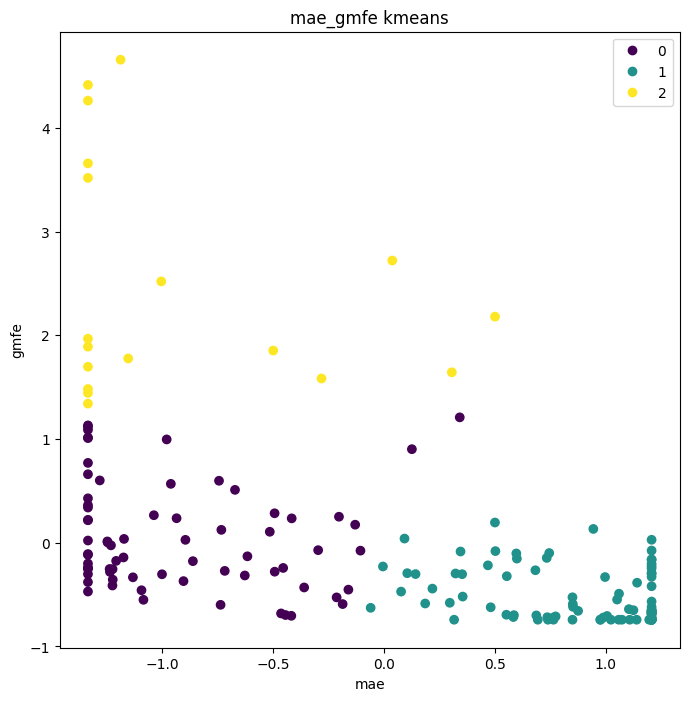

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

def scale_data(data):
    scaler = StandardScaler().fit(data)
    X_scaled = scaler.transform(data)
    return X_scaled

# report.trades['mae'] = report.trades['mae'][report.trades['mae'].notnull()]
scale_mae = scale_data((-report.trades['mae'].values).reshape(-1, 1))
scale_gmfe = scale_data(report.trades['gmfe'].values.reshape(-1, 1))


plt.figure(figsize = (8, 8))
random_state = 100
X = np.hstack((scale_mae,scale_gmfe))
X = X[~np.isnan(X).any(axis=1)]
y_pred = KMeans(n_clusters=3,random_state=random_state).fit_predict(X)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*scatter.legend_elements())
plt.title("mae_gmfe kmeans")
plt.xlabel("mae")
plt.ylabel("gmfe")

In [16]:
cluster_trades = report.trades.copy().head(180)
cluster_trades['group'] = y_pred
cluster_trades['stock_id'] = cluster_trades['stock_id'].apply(lambda s:s[:s.index(' ')])
# ana_targets = cluster_trades[cluster_trades['group'].isin([0,2])]
ana_targets = cluster_trades
ana_targets = ana_targets.reset_index().set_index(['stock_id', 'entry_sig_date'])

In [17]:
close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

In [19]:
負債比率=data.get('fundamental_features:負債比率').deadline()
存貨週轉率=data.get('fundamental_features:存貨週轉率').deadline()
ROE稅後=data.get('fundamental_features:ROE稅後').deadline()
營收成長率=data.get('fundamental_features:營收成長率').deadline()
融資使用率=data.get('margin_transactions:融資使用率').fillna(0)
融券使用率=data.get('margin_transactions:融券使用率').fillna(0)

外陸資買賣超股數 = data.get('institutional_investors_trading_summary:外陸資買賣超股數(不含外資自營商)')	
外資自營商買賣超股數 = data.get('institutional_investors_trading_summary:外資自營商買賣超股數')
投信買賣超股數	= data.get('institutional_investors_trading_summary:投信買賣超股數')
自營商買賣超股數 = data.get('institutional_investors_trading_summary:自營商買賣超股數(自行買賣)')
自營商買賣超避險 = data.get('institutional_investors_trading_summary:自營商買賣超股數(避險)')
當日沖銷交易成交股數 = data.get('intraday_trading:當日沖銷交易成交股數')
當日沖銷交易買進成交金額 = data.get('intraday_trading:當日沖銷交易買進成交金額')
當日沖銷交易賣出成交金額 = data.get('intraday_trading:當日沖銷交易賣出成交金額')
集保人數 = data.get('inventory')
本益比	= data.get('price_earning_ratio:本益比')	
股價淨值比	= data.get('price_earning_ratio:股價淨值比')	
庫藏股買回總金額 = data.get('treasury_stock:本次已買回總金額')


close = data.get('price:收盤價')
open = data.get('price:開盤價')	
high = data.get('price:最高價')	
low = data.get('price:最低價')
volume = data.get('price:成交股數', save_to_storage=True)

rsi = data.indicator('rsi', timeperiod = 20)
atr = data.indicator('atr', adjust_price=True, resample='D',timeperiod=10)
adosc = data.indicator("adosc",adjust_price=False, resample="D", fastperiod=3,slowperiod=10)
upper_band = close > data.indicator("bbands", timeperiod=10)[0]
sma10 = close > close.rolling(window=10).mean()
sma20 = close > close.rolling(window=20).mean()
sma60 = close > close.rolling(window=60).mean()
vol20 = volume > volume.rolling(window=20).mean()
vol60 = volume > volume.rolling(window=60).mean()
macd = close.ewm(span=12, adjust=False).mean() - close.ewm(span=26, adjust=False).mean()
vol_cumsum = volume.rolling(20).sum()
lower_shadow = (close-low)/(open-low)

pct_change = close.pct_change()
profit = pct_change.rolling(20).mean()
risk = pct_change.rolling(20).std()
sharpe = profit / risk * (252 ** 0.5)

sheep = (close - close.shift(5)) / close.shift(5) 

atr = data.indicator('atr', adjust_price=True,timeperiod=10)
adj_close = data.get('etl:adj_close')
entry_volatility = atr/adj_close


features={'負債比率':負債比率,'存貨週轉率':存貨週轉率,'ROE稅後':ROE稅後,'營收成長率':營收成長率,'融資使用率':融資使用率,'融券使用率':融券使用率,'entry_volatility':entry_volatility,
          '外陸資買賣超股數':外陸資買賣超股數, '外資自營商買賣超股數':外資自營商買賣超股數, '投信買賣超股數':投信買賣超股數, '自營商買賣超避險':自營商買賣超避險, '自營商買賣超股數':自營商買賣超股數, 'RSI':rsi, 'ADOSC':adosc,
          'ADOSC':adosc, '布林通道上緣':upper_band, '10日均線':sma10, '20日均線':sma20, 'sma60':sma60, 'vol20':vol20,'vol60':vol60, 'macd':macd, 'vol_cumsum':vol_cumsum, 'lower_shadow':lower_shadow, '夏普':sharpe, 'sheep':sheep}

def unstack_feat(col,feat):
    reindex_date = list(set(ana_targets.index.get_level_values(1)))
    df= feat.reindex(reindex_date,method='ffill')
    df = df.unstack().to_frame()
    df.columns=[col]
    df=df.replace(np.inf,np.nan)
    return df

# feats_df = pd.concat([unstack_feat(k,v) for k,v in features.items()],axis=1)
# dataset = pd.concat([feats_df,ana_targets[['group']]],axis=1)
# dataset.index.names = ['stock_id','date']
# dataset=dataset.dropna()
# dataset

In [ ]:
test_select = dataset.index.get_level_values('date') > '2019'
dataset_train = dataset[~test_select]
dataset_test = dataset[test_select]
dataset_test

負債比率     存貨週轉率     ROE稅後       營收成長率  融資使用率  融券使用率  \
stock_id date                                                                  
1101     2019-12-31  44.646318  2.255256  3.551863   -4.100854   0.72   0.02   
         2020-09-30  48.904763  2.349768  4.281615   -2.880500   0.71   0.01   
1102     2019-09-27  45.003631  1.751544  4.640582    8.846399   0.67   0.02   
         2019-03-29  42.959276  1.987106  2.637461   32.414099   0.43   0.01   
1103     2022-12-30  39.087783  3.133863  1.292067    1.096163   0.46   0.00   
...                        ...       ...       ...         ...    ...    ...   
9958     2020-09-30  53.885495  0.899673  3.957127  183.347064  24.83  17.94   
         2020-03-31  49.961424  0.721698  2.071536  138.032223  27.16   3.79   
9962     2022-09-30  31.413095  0.870762  5.705128   26.015615  15.08   0.06   
         2021-09-30  22.579387  1.150951  3.871838   12.073061  21.23   1.26   
         2021-12-30  39.973786  0.649981  3.977542   47.309005  17.65   0.27   

                     entry_volatility   外陸資買賣超股數  外資自營商買賣超股數   投信買賣超股數  ...  \
stock_id date                                                           ...   
1101     2019-12-31          0.008518  -980000.0         0.0  290000.0  ...   
         2020-09-30          0.015040 -5209550.0         0.0 -124000.0  ...   
1102     2019-09-27          0.014111  -658114.0         0.0  122000.0  ...   
         2019-03-29          0.021015  1245711.0         0.0  -85000.0  ...   
1103     2022-12-30          0.016229    -6000.0         0.0       0.0  ...   
...                               ...        ...         ...       ...  ...   
9958     2020-09-30          0.050617  -145000.0         0.0   92000.0  ...   
         2020-03-31          0.047675   157000.0         0.0  -48000.0  ...   
9962     2022-09-30          0.033162    50000.0         0.0       0.0  ...   
         2021-09-30          0.057650   195000.0         0.0       0.0  ...   
         2021-12-30          0.040174  -246000.0         0.0       0.0  ...   

                     20日均線  sma60  vol20  vol60      macd   vol_cumsum  \
stock_id date                                                            
1101     2019-12-31   True   True  False  False  0.494570  232651470.0   
         2020-09-30  False  False  False  False -0.679213  340832189.0   
1102     2019-09-27  False  False  False  False  0.077814  146912921.0   
         2019-03-29   True   True   True   True  0.657456  202382445.0   
1103     2022-12-30  False   True  False  False  0.051242    2984790.0   
...                    ...    ...    ...    ...       ...          ...   
9958     2020-09-30  False   True  False  False  3.837805  367685156.0   
         2020-03-31  False   True  False   True  0.156806  241043692.0   
9962     2022-09-30  False  False  False  False -0.157876    8393822.0   
         2021-09-30  False  False  False  False -0.252687   72389971.0   
         2021-12-30  False   True  False  False  0.312821   48256292.0   

                    lower_shadow        夏普     sheep group  
stock_id date                                               
1101     2019-12-31     1.333333  9.702467  0.012746   0.0  
         2020-09-30     0.428571 -2.242439  0.009756   2.0  
1102     2019-09-27     0.250000  2.308628 -0.008018   2.0  
         2019-03-29     1.875000  1.924293  0.015190   2.0  
1103     2022-12-30     0.000000 -2.783446 -0.005714   2.0  
...                          ...       ...       ...   ...  
9958     2020-09-30     3.000000  1.143138 -0.037594   0.0  
         2020-03-31    16.500000  0.169564  0.041555   2.0  
9962     2022-09-30     2.166667 -0.083229 -0.066667   0.0  
         2021-09-30     3.000000 -2.451048  0.012920   0.0  
         2021-12-30     0.062500  2.805830 -0.035135   0.0  

[1540 rows x 26 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# find high mae label
label = ana_targets[-ana_targets['mae']> ana_targets['gmfe']]['group'].values[0]
features_name = list(features.keys())
cf = DecisionTreeClassifier(max_depth=3)
cf.fit(dataset_train[features_name], dataset_train['group'] ==label)

DecisionTreeClassifier(max_depth=3)

f1_score: 0.28688524590163933
precision_score(p): 0.4827586206896552
recall_score(p): 0.20408163265306123


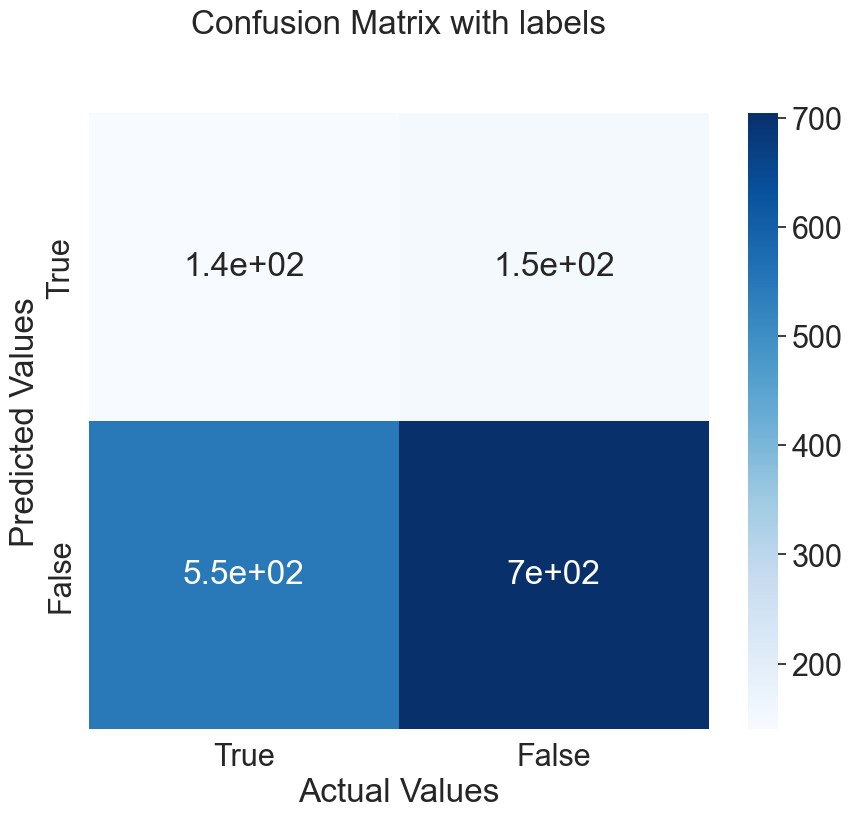

In [ ]:
import pandas as pd
from sklearn import metrics
import seaborn as sns

prediction = cf.predict(dataset_test[features_name])
confusion_matrix = metrics.confusion_matrix(dataset_test['group'] == label, prediction)
tn, fp, fn, tp = confusion_matrix.ravel()
confusion_matrix=np.array([[tp, fp],[fn,tn]])



print('f1_score:',metrics.f1_score(dataset_test['group'] == label, prediction))
print('precision_score(p):',metrics.precision_score(dataset_test['group'] == label, prediction))
print('recall_score(p):',metrics.recall_score(dataset_test['group'] == label, prediction))


plt.figure(figsize=(10, 8))
sns.set(font_scale=2)

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

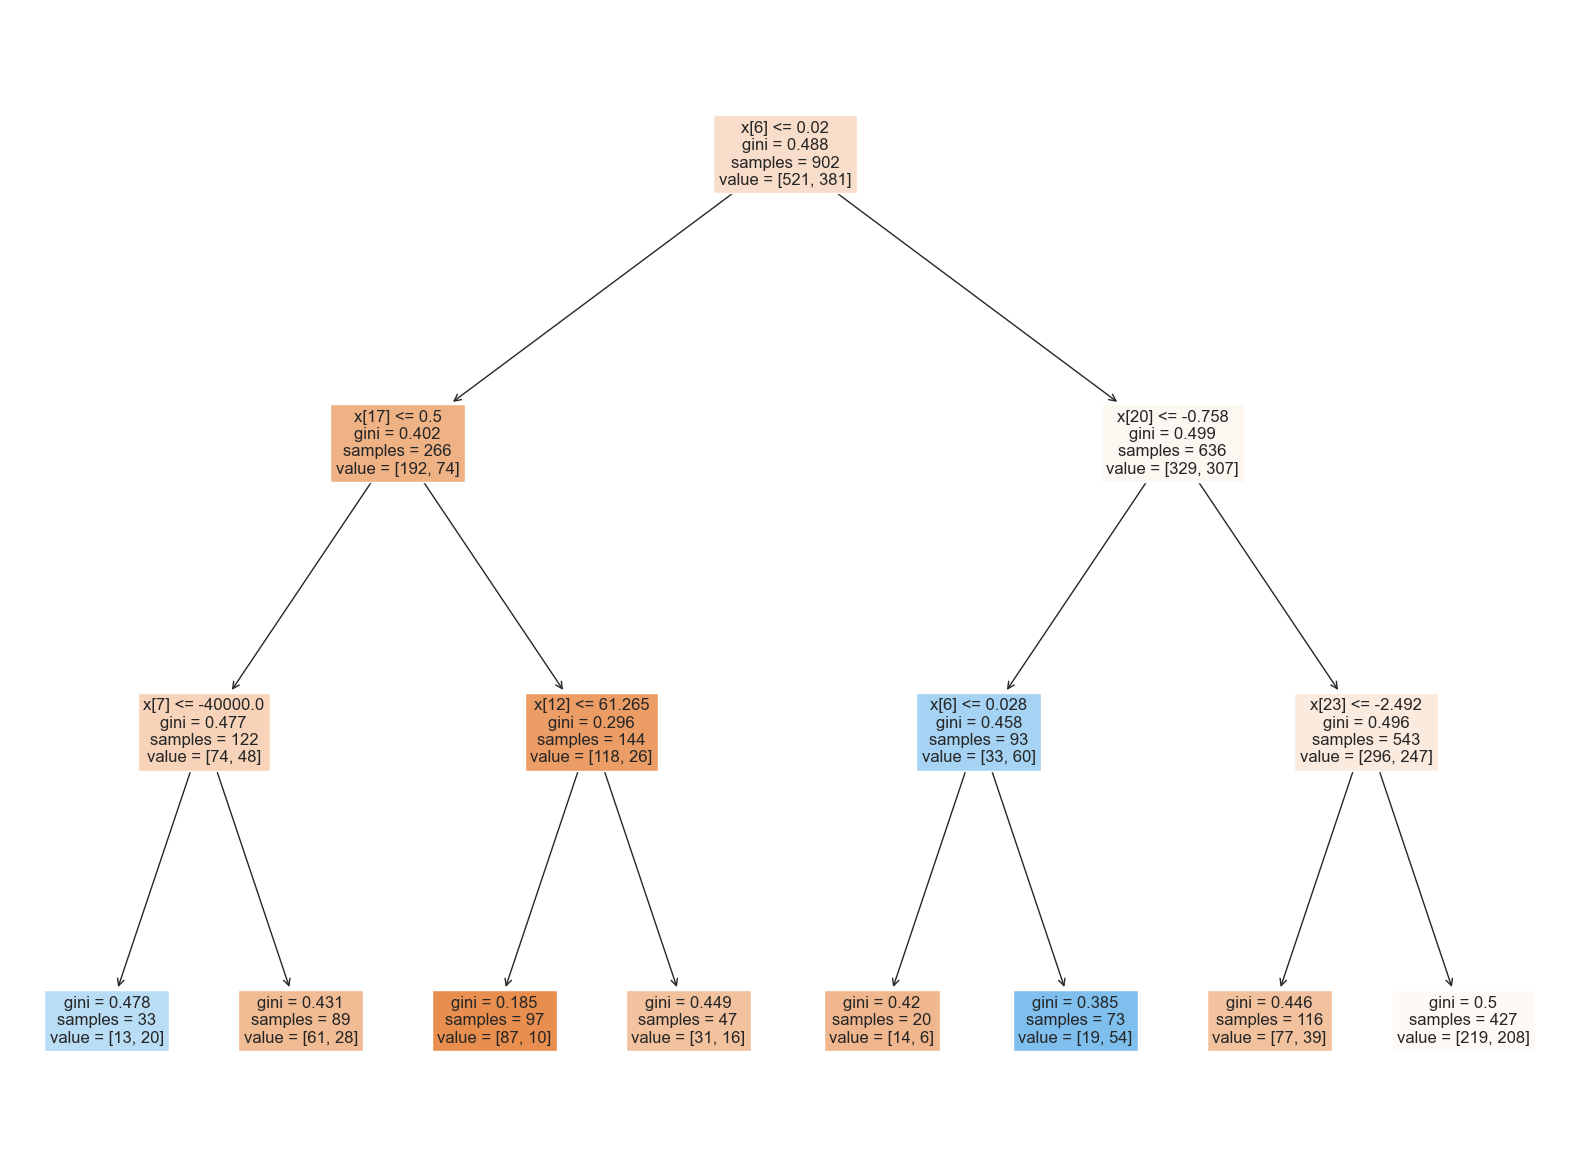

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(cf, fontsize=12,filled=True,)
plt.show()

In [ ]:
print(features_name[6],features_name[17],features_name[20])

entry_volatility sma60 macd


In [ ]:
importance = pd.Series(cf.feature_importances_, index=features_name).sort_values(ascending=False)
importance

entry_volatility    0.480270
sma60               0.132130
macd                0.126905
夏普                  0.091706
外陸資買賣超股數            0.090270
RSI                 0.078720
布林通道上緣              0.000000
lower_shadow        0.000000
vol_cumsum          0.000000
vol60               0.000000
vol20               0.000000
20日均線               0.000000
10日均線               0.000000
負債比率                0.000000
ADOSC               0.000000
存貨週轉率               0.000000
自營商買賣超股數            0.000000
自營商買賣超避險            0.000000
投信買賣超股數             0.000000
外資自營商買賣超股數          0.000000
融券使用率               0.000000
融資使用率               0.000000
營收成長率               0.000000
ROE稅後               0.000000
sheep               0.000000
dtype: float64

In [20]:
condition1 = close > 5
condition2 = gross_profit_per > gross_profit_per.shift(1).rolling(23).max()
condition3 = change_per.rolling(10).max() < 0.05 
conditions = condition1 & condition2 & condition3 & (entry_volatility<0.02)

In [30]:
position= conditions
position = position[position.index >= '2018-09-01']
report = sim(position=position,resample='2Q', stop_loss=0.1, touched_exit=True, position_limit=0.25, fee_ratio=1.425/1000*0.3, live_performance_start='2023-02-10', mae_mfe_window=60)
print(report.get_stats(resample='1d', riskfree_rate=0.02)['daily_sharpe'])
print(report.get_stats(resample='1d', riskfree_rate=0.02)['max_drawdown'])
report.display()
report.display_mae_mfe_analysis()

c:\Program Files\Python\lib\site-packages\finlab\backtest.py:316: RuntimeWarning:

invalid value encountered in double_scalars



1.273026523328306
-0.14684370726330853


--Stats--
annualized_rate_of_return     12.52%
sharpe                          1.27
max_drawdown                 -14.68%
win_ratio                     58.12%

--Latest Position--


1324    0.052632
1436    0.052632
1442    0.052632
1443    0.052632
1445    0.052632
1808    0.052632
2324    0.052632
2365    0.052632
2504    0.052632
2506    0.052632
3028    0.052632
3030    0.052632
4413    0.052632
4907    0.052632
5469    0.052632
6219    0.052632
6486    0.052632
9912    0.052632
9925    0.052632
Name: 2023-09-30 00:00:00, dtype: float64